In [1]:
# load libraries numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Download and read the data
url = "https://songyao21.github.io/course_data/PCUnlimited.csv"
PCUnlimited = pd.read_csv(url)

In [3]:
# Display the first and last 5 rows of the data
print(PCUnlimited.head())
print(PCUnlimited.tail())

   cust_num respond gender  age  numpurch  totdol       region addresstype
0         1      no   male   37         1      59         west       urban
1         2      no   male   41         2     118    northeast       rural
2         3      no   male   37         1      60      midwest       urban
3         4     yes   male   36         2     497  midatlantic       urban
4         5      no   male   36         1      64  midatlantic       rural
     cust_num respond  gender  age  numpurch  totdol        region addresstype
995       996      no    male   37         2     184     northeast       urban
996       997      no    male   44         1      62   midatlantic       rural
997       998      no    male   38         1      52       midwest       rural
998       999     yes  female   40         2      87     southeast       rural
999      1000     yes  female   42         2     708  southcentral       rural


In [4]:
# ****** Q1, What percentage of PCUnlimited customers are female? ******
female_count = PCUnlimited['gender'].value_counts() # count the unique values of the "gender" column
female_percentage = female_count.get('female', 0) / len(PCUnlimited) * 100 # calculate the percentage of "female"; 0 is the default in case there is no "female" in the column
print(f"Percentage of females: {female_percentage:.2f}%")

Percentage of females: 27.50%


In [5]:
# ****** Q2, What is the average age of PCUnlimited customers? ****** 
# Group by 'region', count the number of customers, and sort by the count in descending order
customer_count_by_region = (
    PCUnlimited.groupby('region')
    .size()  # Count the number of occurrences in each group
    .reset_index(name='num_of_customer_by_region')  # Reset index and rename count column
    .sort_values(by='num_of_customer_by_region', ascending=False)  # Sort by count in descending order
    .reset_index(drop=True)  # Reset index and drop the old index before the sort_values
)

print(customer_count_by_region)

         region  num_of_customer_by_region
0       midwest                        263
1     northeast                        227
2   midatlantic                        167
3          west                        164
4  southcentral                         98
5     southeast                         81


In [6]:
#****** Q3, which regions have the highest and lowest average total spendings?
# Group by 'region', calculate the average of 'totdol', and sort by the average in descending order
average_tot_spend_by_region = (
    PCUnlimited.groupby('region')
    ['totdol'].mean()  # Calculate the average of 'totdol' in each group
    .reset_index(name='average_tot_spend_by_region')  # Reset index and rename average column
    .sort_values(by='average_tot_spend_by_region', ascending=False)  # Sort by average in descending order
    .reset_index(drop=True)  # Reset index
)

print(average_tot_spend_by_region)


         region  average_tot_spend_by_region
0     northeast                   380.735683
1  southcentral                   367.622449
2       midwest                   357.399240
3     southeast                   322.864198
4   midatlantic                   301.502994
5          west                   257.780488


In [7]:
# ****** Q4, What are the average $ spent and the total # of purchases by region? 
# Group by 'region', calculate the average of 'totdol' and the sum of 'numpurch'
# rename the columns, and reset the index
average_tot_spend_tot_purch_by_region = (
    PCUnlimited.groupby('region')
    .agg(
        average_tot_spend_by_region=('totdol', 'mean'),  # Calculate the average of 'totdol'
        total_purchases_by_region=('numpurch', 'sum')  # Calculate the sum of 'numpurch'
    )
    .reset_index()  # Reset index
)

print(average_tot_spend_tot_purch_by_region)

         region  average_tot_spend_by_region  total_purchases_by_region
0   midatlantic                   301.502994                        289
1       midwest                   357.399240                        473
2     northeast                   380.735683                        449
3  southcentral                   367.622449                        182
4     southeast                   322.864198                        150
5          west                   257.780488                        279


In [8]:
# ****** Q5, What are the average $ spent and the total # of purchases by gender? 
# Group by gender, calculate the average of 'totdol' and the sum of 'numpurch'
# rename the columns, but reset the index
average_tot_spend_tot_purch_by_gender = (
    PCUnlimited.groupby('gender')
    .agg(
        average_tot_spend_by_gender=('totdol', 'mean'),  # Calculate the average of 'totdol'
        total_purchases_by_gender=('numpurch', 'sum')  # Calculate the sum of 'numpurch'
    )
    .reset_index()  # Reset index
)

# average_tot_spend_tot_purch_by_gender = (
#     PCUnlimited.groupby('gender')
#     .agg({'totdol': 'mean', 'numpurch': 'sum'})  # Calculate the average of 'totdol' and the sum of 'numpurch'
#     .reset_index()  # Reset index
# )

print(average_tot_spend_tot_purch_by_gender)


   gender  average_tot_spend_by_gender  total_purchases_by_gender
0  female                   345.392727                        496
1    male                   331.373793                       1326


In [9]:
# ****** Q6, Calculate the correlation between total spending and total # of orders. 
# Calculate the correlation between 'totdol' and 'numpurch'

### Method 1， using the corr() method without p-value
correlation_tot_spend_tot_purch = PCUnlimited['totdol'].corr(PCUnlimited['numpurch'])
print(f"Correlation btw total spending and total number of orders: {correlation_tot_spend_tot_purch:.4f}")

### Method 2, compute the correlation's test statistics  with p-value using scipy.stats 
from scipy.stats import pearsonr
correlation, p_value = pearsonr(PCUnlimited['totdol'], PCUnlimited['numpurch'])
print(f"Correlation btw total spending and total number of orders: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

Correlation btw total spending and total number of orders: 0.8570
Correlation btw total spending and total number of orders: 0.8570
p-value: 0.0000


In [10]:
# ****** Q7, 7.	For both males and females, find their respective percentage of responders to the recent promotion (i.e., 'respond' == 1)?

# Group by 'gender' and 'respond', then count occurrences
response_by_gender = PCUnlimited.groupby(['gender', 'respond']).size().reset_index(name='n_by_gender_response')

# Calculate the percentage of response within each gender group
response_by_gender['percentage'] = \
    response_by_gender.groupby('gender')['n_by_gender_response'].transform(lambda x: x / x.sum() * 100)

## Note: the funciton "lambda x: x / x.sum() * 100" can be replaced by the following function explicitly defined
# def calculate_percentage(x):
#     return x / x.sum() * 100

print(response_by_gender)

   gender respond  n_by_gender_response  percentage
0  female      no                   232   84.363636
1  female     yes                    43   15.636364
2    male      no                   632   87.172414
3    male     yes                    93   12.827586


In [11]:
# ****** Q8, what are min, max, and average of individual spending per order?
# Calculate the min, max, and average of 'totdol' per 'numpurch'

# Calculate 'spending_per_order' as a new column
PCUnlimited['spending_per_order'] = PCUnlimited['totdol'] / PCUnlimited['numpurch']

# Summarize to find min, max, and avg of 'spending_per_order'
summary = PCUnlimited['spending_per_order'].agg(['min', 'max', 'mean']).reset_index()
summary.columns = ['spending_per_order_metric', 'value']  # Renaming columns for clarity

print(summary)


  spending_per_order_metric       value
0                       min    14.00000
1                       max  1095.37500
2                      mean   126.68333


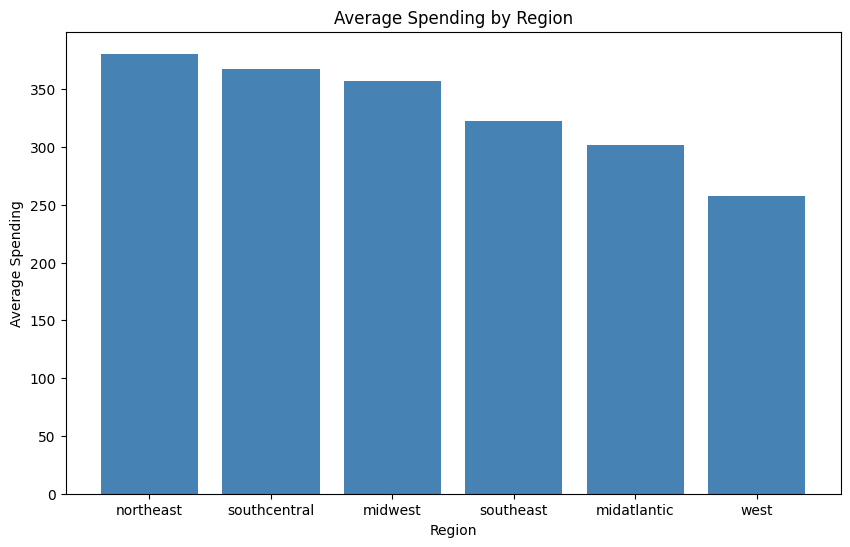

In [12]:
# ****** Q9, draw a bar chart of q3 above, i.e., average totdol by region?
# Draw a bar chart of 'average_tot_spend_by_region', the dataframe from Q3
fig_bar, ax_bar = plt.subplots(figsize=(10, 6))
ax_bar.bar(average_tot_spend_by_region['region'], average_tot_spend_by_region['average_tot_spend_by_region'], color='steelblue')
ax_bar.set_xlabel('Region')
ax_bar.set_ylabel('Average Spending')
ax_bar.set_title('Average Spending by Region')

plt.show()
# fig_bar.savefig('Average_Spending_by_Region.png')

In [13]:
#****** Q10. Create a new dataframe that select the variables of cust_num, respond, gender
PCUnlimited_small = PCUnlimited[['cust_num', 'respond', 'gender']].copy()
PCUnlimited_small.head()

,cust_num,respond,gender
0,1,no,male
1,2,no,male
2,3,no,male
3,4,yes,male
4,5,no,male


In [14]:
#****** Q11. Create a new dataframe that filters to keep only female and addresstype=='urban'
PCUnlimited_female_urban = PCUnlimited[(PCUnlimited['gender'] == 'female') & (PCUnlimited['addresstype'] == 'urban')].copy()
PCUnlimited_female_urban.reset_index(drop=True, inplace=True)
PCUnlimited_female_urban.head()

,cust_num,respond,gender,age,numpurch,totdol,region,addresstype,spending_per_order
0,12,yes,female,38,2,151,midwest,urban,75.5
1,13,yes,female,54,6,2286,southeast,urban,381.0
2,15,no,female,35,1,946,midwest,urban,946.0
3,34,yes,female,39,2,52,northeast,urban,26.0
4,35,no,female,38,2,75,midatlantic,urban,37.5
